## Time Series
Time series refers to a sequence of data points or observations that are collected and recorded over a period of time at regular intervals. It represents the behavior and patterns of a variable or phenomenon over time, allowing analysis and forecasting of trends, seasonality, and other temporal dependencies. Time series analysis involves exploring and modeling the data to uncover underlying patterns, make predictions, or gain insights into the dynamics and behavior of the observed phenomenon. It is widely used in various domains, including finance, economics, weather forecasting, and signal processing.

## ARIMA (AutoRegressive Integrated Moving Average)
Arima is a popular and powerful time series forecasting model. It combines autoregressive (AR), differencing (I), and moving average (MA) components to capture the temporal patterns and dependencies in the data. ARIMA models are used to predict future values based on past observations by considering the trend, seasonality, and random fluctuations in the time series. The model parameters, such as the order of autoregressive and moving average components, are determined through statistical methods and analysis of the autocorrelation and partial autocorrelation functions of the time series.

Yahoo Finance has recently made changes to their website, and it seems they no longer provide the option to download historical data directly from their site. However, there are still alternative ways to obtain the historical data for the S&P 500 index. One such method is by using Python and a library called yfinance.

Here's an example of how you can use yfinance to download historical data for the S&P 500 index:


In [ ]:
import yfinance as yf

# Define the ticker symbol for the S&P 500 index
ticker_symbol = "^GSPC"

# Define the desired date range for the historical data
start_date = "2000-01-01"
end_date = "2023-06-23"

# Download the historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2023-06-15  4365.330078  4439.200195  4362.600098  4425.839844  4425.839844   
2023-06-16  4440.950195  4448.470215  4407.439941  4409.589844  4409.589844   
2023-06-20  4396.109863  4400.149902  4367.189941  4388.709961  4388.709961   
2023-06-21  4380.009766  4386.220215  4360.140137  4365.689941

**Required Libraries**

In [ ]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00


Visualize the stock’s daily closing price.

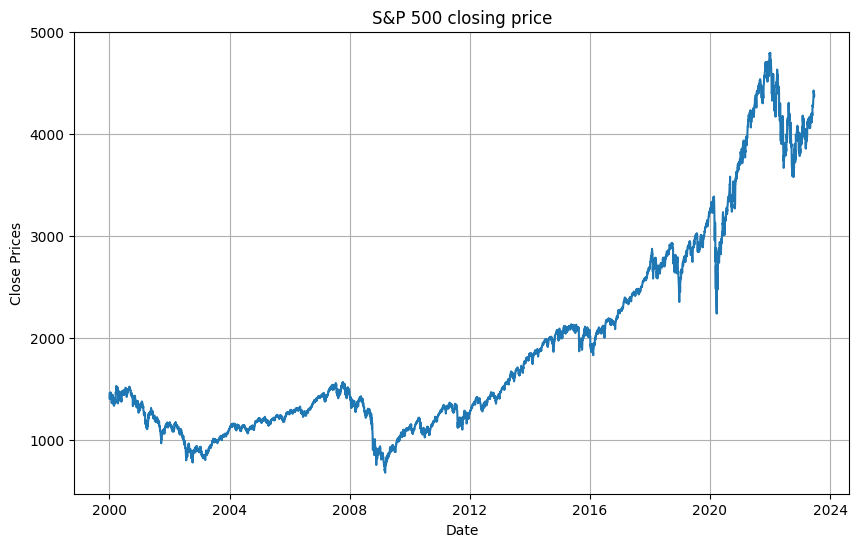

In [ ]:


#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('S&P 500 closing price')
plt.show()

In [ ]:
import plotly.express as px
import seaborn as sns

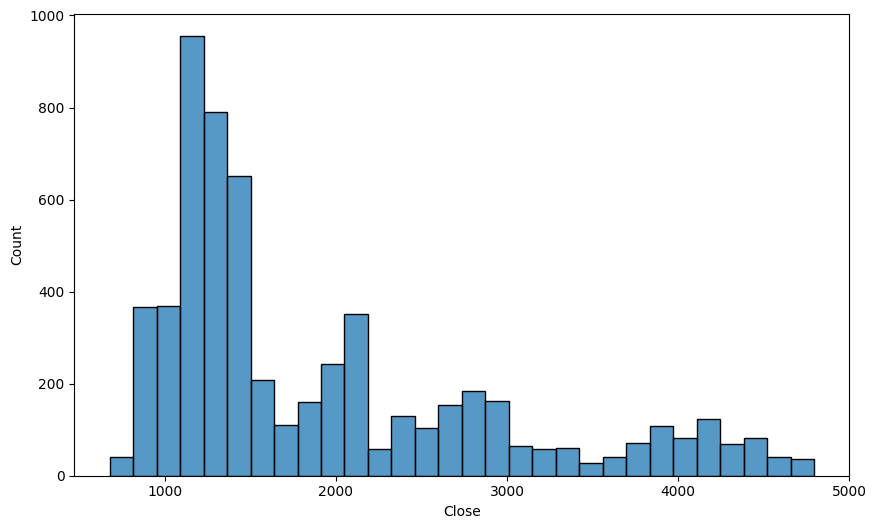

In [ ]:
sns.histplot(data['Close']);

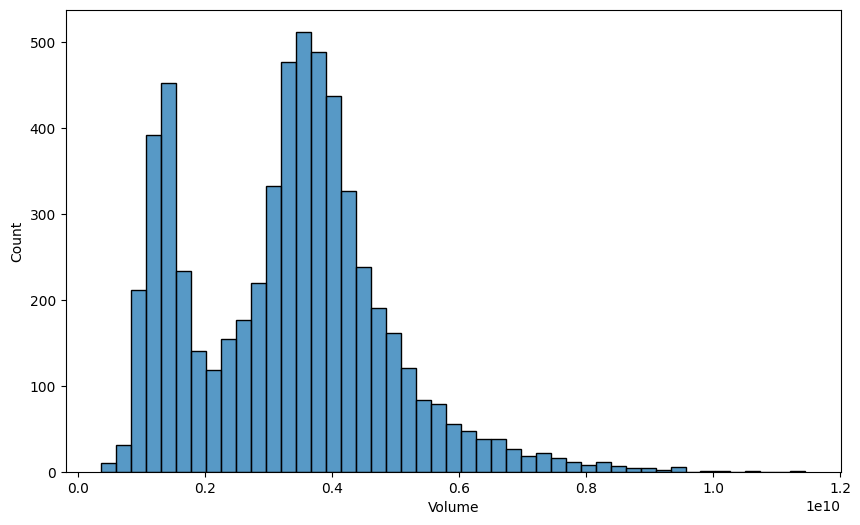

In [ ]:
sns.histplot(data['Volume']);

**Distribution of the dataset**

<Axes: ylabel='Density'>

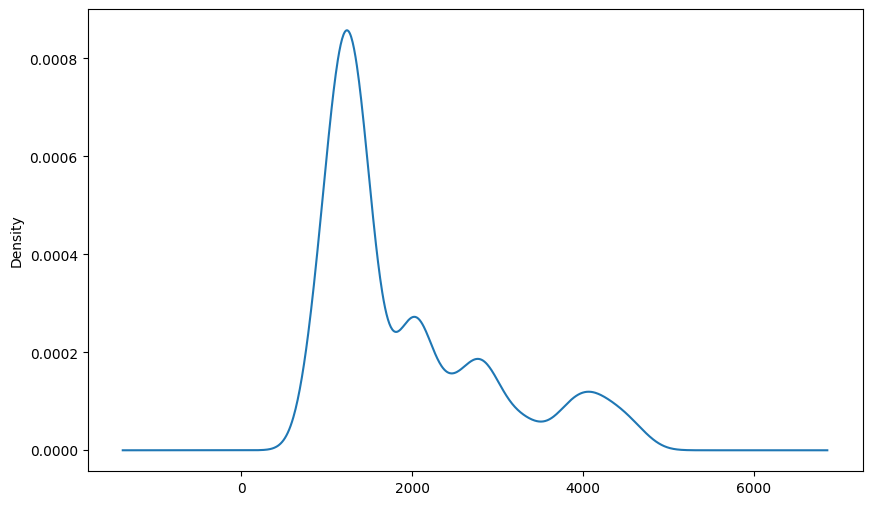

In [ ]:
df_close = data['Close']
df_close.plot(kind='kde')

## Main components of time series
- **OBSERVED** In the context of time series analysis, "observed" refers to the actual data points or values that are recorded or measured at specific time intervals. These observed values represent the real-world measurements or observations of the phenomenon under study.
- **LEVEL** In time series analysis, the level refers to the average or central tendency of the data over time. It represents the long-term average or baseline behavior of the series, disregarding any short-term fluctuations or noise. The level is an important component to understand the overall trend or direction of the time series. By analyzing and modeling the level, one can identify shifts, growth, or stability in the data, and make predictions or detect anomalies based on its behavior.
- **TREND** In time series analysis, the trend refers to the underlying long-term pattern or direction in the data. It represents the consistent, gradual change in the series over an extended period. The trend captures the overall upward or downward movement, indicating whether the series is increasing, decreasing, or remaining relatively stable over time. Trend analysis helps identify the general behavior of the time series and can be useful for forecasting future values. It is often depicted as a smooth line or curve fitted to the data to visually highlight the overall movement and provide insights into the overall direction of the series.
- **SEASONALITY** Seasonality in time series analysis refers to a pattern or recurring fluctuations that occur at regular intervals within the data. These patterns repeat over specific time periods, such as days, weeks, months, or seasons. Seasonality is often observed in various domains, including sales data, stock market indices, weather data, and economic indicators.
- **NOISE** In the context of time series analysis, noise refers to random or unpredictable fluctuations that are present in the observed data. It represents the variability or random disturbances that are unrelated to the underlying patterns or structures in the time series. Noise can arise due to various factors, such as measurement errors, sampling variability, or external influences that are not captured by the chosen model or analysis. Noise can obscure the true patterns in the data and make it more challenging to identify and analyze the underlying trends, seasonality, or other meaningful components. Techniques such as smoothing, filtering, or statistical modeling can help mitigate the impact of noise and improve the accuracy of analysis and forecasting.

## Dickey-Fuller test
The Dickey-Fuller test, also known as the augmented Dickey-Fuller (ADF) test, is a statistical test used to determine whether a given time series has a unit root, indicating the presence of non-stationarity. It is commonly used in econometrics and time series analysis. The test examines the null hypothesis that the time series has a unit root (i.e., it is non-stationary) against the alternative hypothesis of stationarity. By analyzing the test statistic and comparing it to critical values, the Dickey-Fuller test helps assess the presence of trends or unit roots in the data and provides insights into the stationarity properties of the time series.

<img src = "https://sp-ao.shortpixel.ai/client/q_glossy+w_1040+h_585+to_auto+ret_img/https://numxl.com/wp-content/uploads/adf-test-featured-1024x576.png" width ='380'>

**H0: Null Hypothesis**: The series has a unit root (value of a =1)

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

**H1: Alternate Hypothesis**: The series has no unit root.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance)

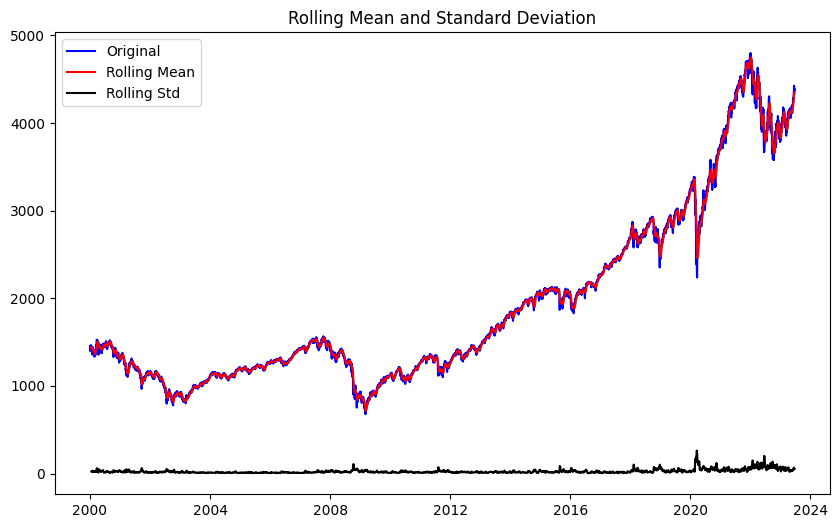

Results of dickey fuller test
Test Statistics                   1.263793
p-value                           0.996398
No. of lags used                 32.000000
Number of observations used    5872.000000
critical value (1%)              -3.431464
critical value (5%)              -2.862032
critical value (10%)             -2.567032
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

Mean and SDT encreased in the graph above, so the series is not stationary.

The p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x600 with 0 Axes>

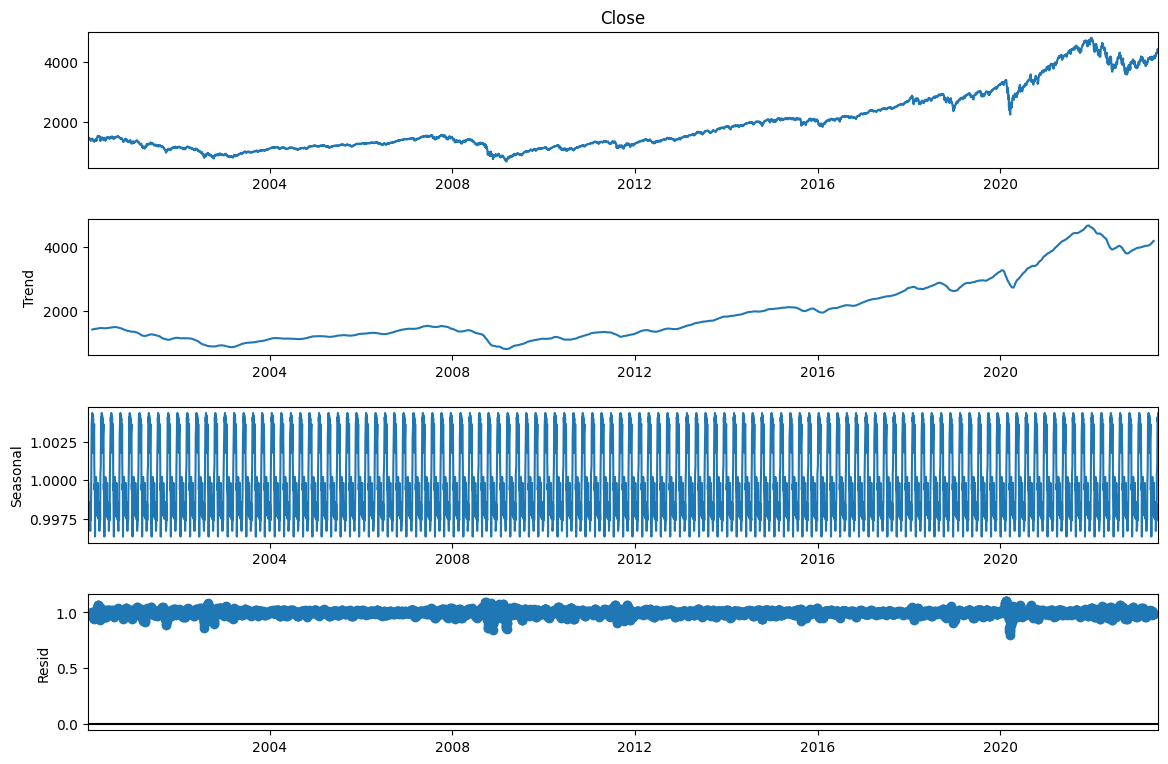

In [ ]:
result = seasonal_decompose(df_close, model='multiplicative', period = 52)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(12, 8)

To reduce the magnitude of the values and the growing trend in the series, we first take a log of the series. We then calculate the rolling average of the series after obtaining the log of the series. A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

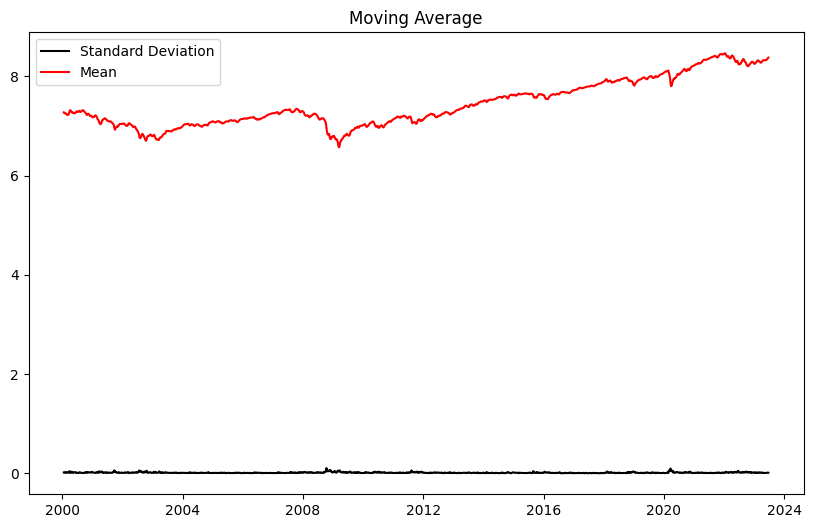

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we’ll develop an ARIMA model and train it using the stock’s closing price from the train data. So, let’s visualize the data by dividing it into training and test sets.

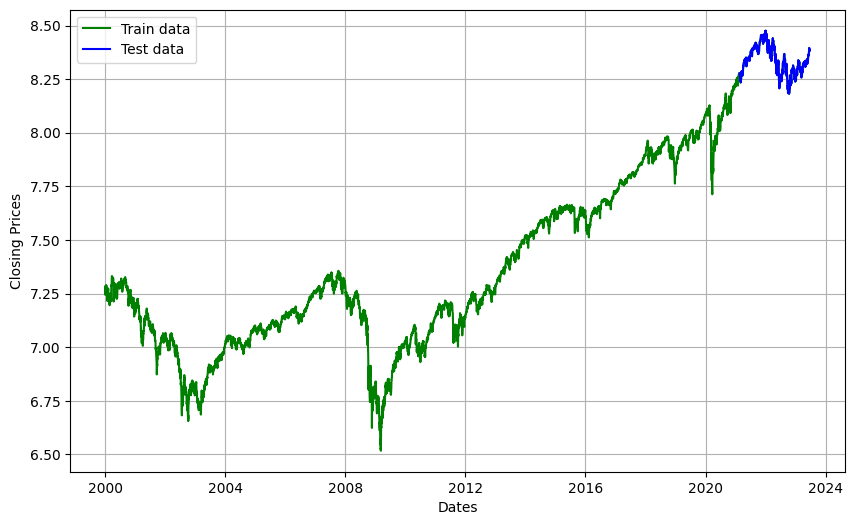

In [ ]:
#split data into train and testing set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Auto ARIMA: is an automated algorithm for selecting the optimal ARIMA model parameters for a given time series. It utilizes a combination of algorithms and heuristics to determine the appropriate order of differencing (integration), autoregressive (AR), and moving average (MA) components. Auto ARIMA systematically explores different combinations of these components, evaluates their performance based on statistical metrics like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion), and selects the model with the best fit. It simplifies the process of ARIMA modeling by automating the selection of parameters, making it a convenient tool for time series analysis and forecasting.

The auto_arima function works by performing differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller, or Phillips–Perron) to determine the order of differencing, d, and then fitting models within start p, max p, start q, max q ranges. After conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D, auto_arima also seeks to identify the optimal P and Q hyper-parameters if the seasonal option is enabled.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-31439.828, Time=0.86 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-31506.948, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31508.116, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-31440.554, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31506.118, Time=2.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31506.111, Time=3.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-31504.167, Time=3.96 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31508.479, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31506.479, Time=1.54 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-31506.473, Time=2.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-31507.357, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-31504.508, Time=1.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 20.922 seconds
                               SARIMAX Results                 

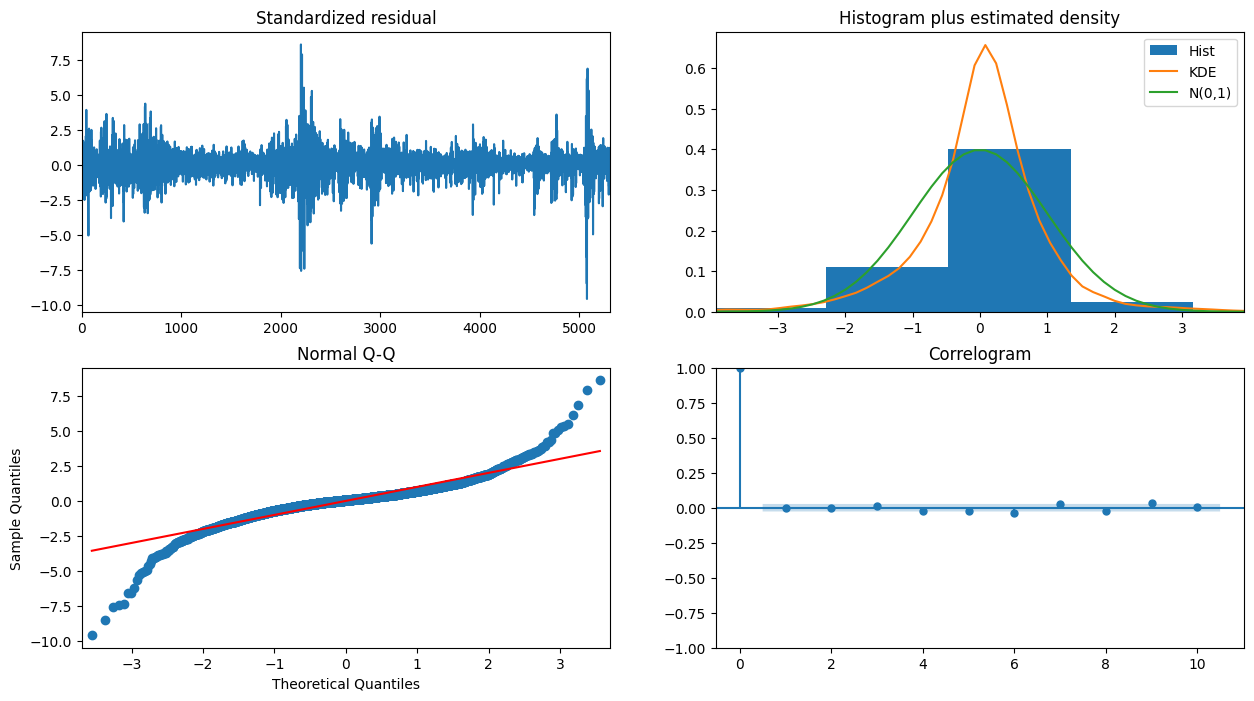

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**Top left:** The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

**Top Right:** The density plot on the top right suggests a normal distribution with a mean of zero.

**Bottom left:** The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

**Bottom Right:** The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

### As a result, the Auto ARIMA model assigned the values 1, 1, and 2 to, p, d, and q, respectively.

## Model

In [ ]:
model = ARIMA(train_data, order=(0,1,1))
fitted = model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5311
Model:                 ARIMA(0, 1, 1)   Log Likelihood               15756.240
Date:                Sat, 24 Jun 2023   AIC                         -31508.479
Time:                        19:07:18   BIC                         -31495.324
Sample:                             0   HQIC                        -31503.883
                               - 5311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1153      0.007    -17.071      0.000      -0.129      -0.102
sigma2         0.0002   1.24e-06    125.247      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

The given results are from the estimation of an ARIMA(0,1,1) model on a time series with the dependent variable being "Close" and 5311 observations.

Here is the interpretation of the results:

- Dep. Variable: "Close": This indicates that the analysis is performed on the "Close" variable.
- No. Observations: 5311: This represents the number of observations in the dataset.
- Model: ARIMA(0,1,1): This specifies the order of the ARIMA model, with 1 autoregressive term, 1 differencing term, and 2 moving average terms.
- Log Likelihood: The log likelihood value represents the maximized log-likelihood of the model. Higher values indicate a better fit.
- AIC: The Akaike Information Criterion is a measure of the relative quality of the model. Lower AIC values indicate a better fit.
- BIC: The Bayesian Information Criterion is another criterion for model selection. Lower BIC values indicate a better fit.
- Sample: 0 - 5311: This shows the range of the observations used in the analysis.
- Covariance Type: "opg": This specifies the covariance type used in the estimation.

- Coefficients: The estimated coefficients for the ARIMA model are shown, along with their standard errors, z-scores, and p-values. These coefficients represent the weights assigned to each component of the model (AR and MA terms).
- sigma2: This represents the estimated variance of the model's error term.
- Ljung-Box (Q): This is a test statistic for testing the null hypothesis of no autocorrelation in the residuals. A p-value less than 0.05 indicates significant autocorrelation.
- Jarque-Bera (JB): This is a test statistic for testing the null hypothesis of the normality of the residuals. A p-value less than 0.05 indicates significant departure from normality.
- Heteroskedasticity (H): This is a test statistic for testing the null hypothesis of no heteroscedasticity (constant variance) in the residuals. A p-value less than 0.05 indicates significant heteroscedasticity.
- Skew: This represents the skewness of the residuals. A value close to 0 indicates a symmetric distribution.
- Kurtosis: This represents the kurtosis of the residuals. A value higher than 3 indicates heavier tails compared to a normal distribution.
These results provide information about the estimated coefficients, goodness of fit measures, statistical tests for residual properties, and other relevant statistics for evaluating the ARIMA model.

"ar.L1" coefficient: The estimated coefficient for the autoregressive (AR) term at lag 1 is -0.1697. This means that there is a negative relationship between the current value and the value at the previous time step (lag 1). A unit increase in the lag 1 value is associated with a decrease of 0.1697 units in the current value.

"std err" (standard error): The standard error associated with the estimated coefficient measures the uncertainty or variability of the coefficient estimate. In this case, the standard error for "ar.L1" is 5.256.

"z" (z-score): The z-score is calculated by dividing the estimated coefficient by its standard error. It measures how many standard deviations the coefficient estimate is away from zero. For "ar.L1," the z-score is -0.032, indicating that the estimated coefficient is -0.032 standard deviations away from zero.

"P>|z|" (p-value): The p-value associated with each coefficient tests the null hypothesis that the coefficient is equal to zero. A low p-value (typically below 0.05) suggests that the coefficient is statistically significant and different from zero. In this case, the p-value for "ar.L1" is 0.974, which is greater than 0.05. This suggests that the coefficient is not statistically significant, and we fail to reject the null hypothesis that it is equal to zero.

The interpretation of "ma.L1," "ma.L2," and "sigma2" follows a similar pattern, representing the coefficients, standard errors, z-scores, and p-values for the first and second moving average (MA) terms and the variance of the error term, respectively. However, note that the p-values for these coefficients are also not statistically significant (greater than 0.05).

In summary, the coefficients provide the estimated impact of the corresponding terms on the current value of the time series. The standard errors indicate the precision of the coefficient estimates, while the z-scores and p-values help assess the statistical significance of the coefficients.

## Forecasting with 95% confidence level

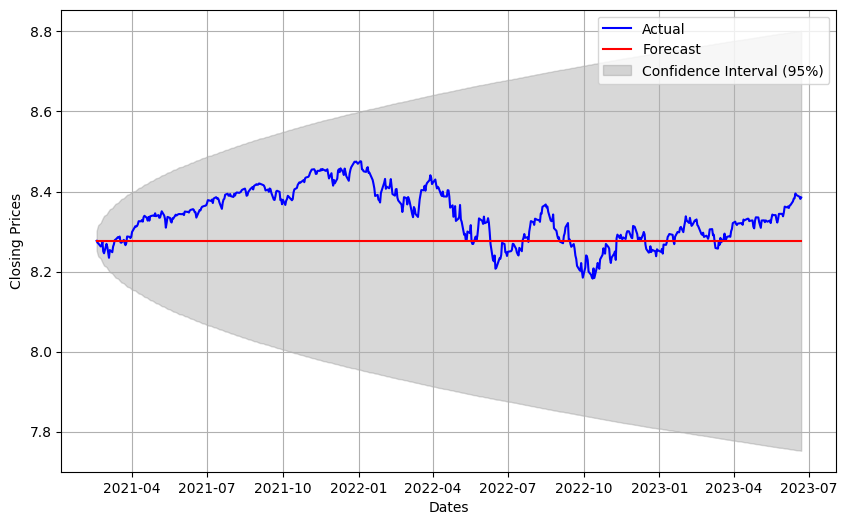

In [ ]:
# Generate forecasts for the test set with confidence intervals
forecast = fitted.get_forecast(steps=len(test_data), alpha=0.05)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int().values

# Visualize the forecasted values along with the actual values and confidence intervals
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data.index, test_data.values, 'blue', label='Actual')
plt.plot(test_data.index, forecast_values, 'red', label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3, label='Confidence Interval (95%)')
plt.legend()
plt.show()


In [ ]:
# Calculate the forecast errors
forecast_errors = test_data.values - forecast_values

# Calculate MSE
mse = mean_squared_error(test_data, forecast_values)

# Calculate MAE
mae = mean_absolute_error(test_data, forecast_values)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs(forecast_errors / test_data.values)) * 100

# Print the metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Squared Error (MSE):  0.007939342491328808
Mean Absolute Error (MAE):  0.07195190862265465
Root Mean Squared Error (RMSE):  0.0891029881167226
Mean Absolute Percentage Error (MAPE):  0.8587393111595908


Mean Squared Error (MSE): The MSE is a measure of the average squared difference between the predicted values and the actual values. In this case, the MSE value is 0.007939342491328808. Since the MSE is a squared value, it is not directly interpretable on its own. However, lower MSE values indicate better accuracy, as they reflect smaller differences between the predicted and actual values.

Mean Absolute Error (MAE): The MAE is a measure of the average absolute difference between the predicted values and the actual values. The MAE value is 0.07195190862265465. It represents the average magnitude of the forecasting errors without considering their direction. Similar to the MSE, lower MAE values indicate better accuracy, as they reflect smaller average deviations from the actual values.

Root Mean Squared Error (RMSE): The RMSE is a commonly used measure of the standard deviation of the forecasting errors. It is calculated by taking the square root of the MSE. The RMSE value is 0.0891029881167226, which provides an estimate of the average magnitude of the forecasting errors in the same units as the original data. As with the MSE and MAE, lower RMSE values indicate better accuracy.

Mean Absolute Percentage Error (MAPE): The MAPE is a measure of the average percentage difference between the predicted values and the actual values, expressed as a percentage. The MAPE value is 0.8587393111595908, which indicates that, on average, the forecasts have an error of approximately 85.87% relative to the actual values. The MAPE is useful for understanding the proportional accuracy of the forecasts.

Overall, the provided metrics indicate the level of accuracy of the forecasting model. Lower values of MSE, MAE, and RMSE indicate better accuracy, while a lower MAPE indicates a smaller average percentage error. It's important to compare these values to the scale and context of the data being forecasted to assess the performance of the model accurately.